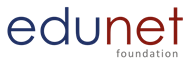

# Edunet Foundation : Class Room Exercises

# Lab: Feature Engineering and Label Encoding

### Objective:

The objective of the "Feature Engineering and Label Encoding" lab is to equip learners with practical skills to enhance the performance of machine learning models through feature engineering and label encoding techniques. The lab begins with an introduction to the importance of feature engineering in improving model accuracy and performance. Learners will gain hands-on experience in creating new features, transforming existing features, and handling categorical data using label encoding and one-hot encoding with libraries such as Pandas and Scikit-Learn. The lab will guide learners through various feature engineering techniques, including polynomial features, interaction terms, and scaling. By the end of the lab, learners will be proficient in applying feature engineering and label encoding to prepare data for machine learning models, enhancing their predictive capabilities and ensuring robust model performance.


### 1. Feature Creation

###### 1.1 Creating New Features from Existing Ones

You can create new features based on existing data that capture additional information.

Example: Creating a `TotalAmount` feature from `Quantity` and `Price`.

In [1]:
import pandas as pd

# Sample dataset
data = {
    'Product': ['A', 'B', 'C', 'D'],
    'Quantity': [10, 15, 7, 9],
    'Price': [100, 150, 200, 250]
}

df = pd.DataFrame(data)

# Creating a new feature 'TotalAmount'
df['TotalAmount'] = df['Quantity'] * df['Price']
print("Dataset with new feature 'TotalAmount':\n", df)


Dataset with new feature 'TotalAmount':
   Product  Quantity  Price  TotalAmount
0       A        10    100         1000
1       B        15    150         2250
2       C         7    200         1400
3       D         9    250         2250


#### 1.2 Extracting Date/Time Features

Date and time features can be transformed into more informative features such as day of the week, month, hour, etc.

* Example: Extracting Day, Month, and Year from a Date Feature

In [2]:
# Sample dataset with dates
data = {
    'OrderDate': pd.to_datetime(['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04'])
}

df = pd.DataFrame(data)

# Extracting new date-related features
df['Day'] = df['OrderDate'].dt.day
df['Month'] = df['OrderDate'].dt.month
df['Year'] = df['OrderDate'].dt.year

print("Dataset with extracted date features:\n", df)


Dataset with extracted date features:
    OrderDate  Day  Month  Year
0 2024-08-01    1      8  2024
1 2024-08-02    2      8  2024
2 2024-08-03    3      8  2024
3 2024-08-04    4      8  2024


### 2. Feature Transformation

#### 2.1 Scaling/Normalization
Scaling or normalizing numerical features ensures that they are on the same scale, which is often necessary for algorithms like `SVM`, `KNN`, and `neural networks`.

In [3]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = {'Height': [150, 160, 170, 180, 190]}
df = pd.DataFrame(data)

# Standardizing the data
scaler = StandardScaler()
df['Height_Standardized'] = scaler.fit_transform(df[['Height']])

print("Dataset with standardized 'Height':\n", df)


Dataset with standardized 'Height':
    Height  Height_Standardized
0     150            -1.414214
1     160            -0.707107
2     170             0.000000
3     180             0.707107
4     190             1.414214


### 2.2 Encoding Categorical Variables

Categorical variables need to be encoded into numerical values to be used in most machine learning models.

* Example: `One-Hot Encoding`

**One-Hot Encoding:** Convert categorical variables into binary columns.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# One-Hot Encoding the categorical feature 'Color'
encoder = OneHotEncoder(sparse=False)
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Color']]), columns=encoder.get_feature_names_out(['Color']))

# Concatenate with original dataframe
df_encoded = pd.concat([df, encoded_df], axis=1)
print("Dataset after one-hot encoding:\n", df_encoded)


Dataset after one-hot encoding:
    Color  Color_Blue  Color_Green  Color_Red
0    Red         0.0          0.0        1.0
1   Blue         1.0          0.0        0.0
2  Green         0.0          1.0        0.0
3   Blue         1.0          0.0        0.0
4    Red         0.0          0.0        1.0


C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Label Encoding
Label Encoding is used to convert categorical text data into numerical data. Each unique category is assigned a unique integer value. This method is particularly useful for ordinal categorical data, where the order of categories is meaningful.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Applying Label Encoding
label_encoder = LabelEncoder()
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])

print("Dataset after label encoding:\n", df)

Dataset after label encoding:
    Color  Color_Encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2


Label encoding is a simple and effective way to convert categorical data into a numerical format, but it’s essential to be cautious when using it with nominal (unordered) categories, as models may mistakenly infer a relationship or order between the encoded numbers.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {'Education': ["High School", "Bachelor's", "Master's", "PhD"]}
df = pd.DataFrame(data)

# Applying Label Encoding
label_encoder = LabelEncoder()
df['Edu_Encoded'] = label_encoder.fit_transform(df['Education'])

print("Dataset after label encoding:\n", df)


Dataset after label encoding:
      Education  Edu_Encoded
0  High School            1
1   Bachelor's            0
2     Master's            2
3          PhD            3


<h2>Categorical Variables and One Hot Encoding</h2>

Categorical Variables contain values that are names, labels or strings. At first glance, these variables seem harmless. However, they can cause difficulties in your machine learning models as they do not know how to assign some numerical importance to them. Why? Because Machine Learning Models want everything to be provided to them in numerical form.

**“Machine Learning Models want everything to be provided to them in numerical form.”**

So, the question now is, how do you extract the meaningful information that these categorical variables hold? See example below:

Here, we have a sample data for a project where we are looking to predict the price per night of an Airbnb listing. Looking at the data and the problem we are solving, we can easily say that this is a supervised problem.

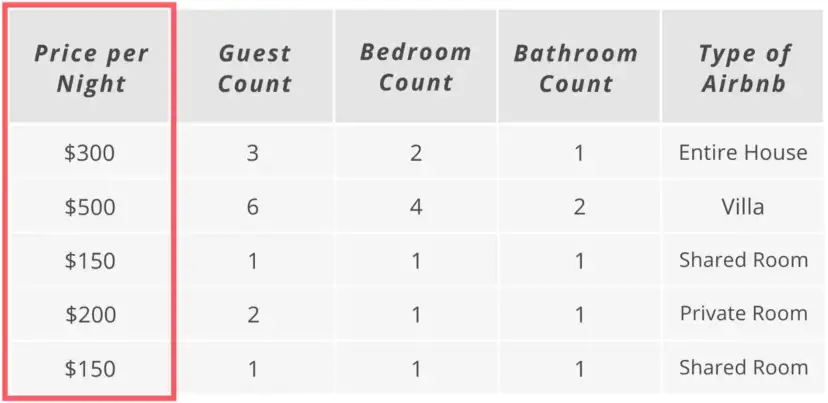

As this is a supervised problem, we have a column for the prices (target variable) and input variables that we will be putting into our model as we believe that they have some sort of relationship with the price per night variable. However, the Type of Airbnb variable is categorical. It is providing a label for each type of Airbnb listing. 

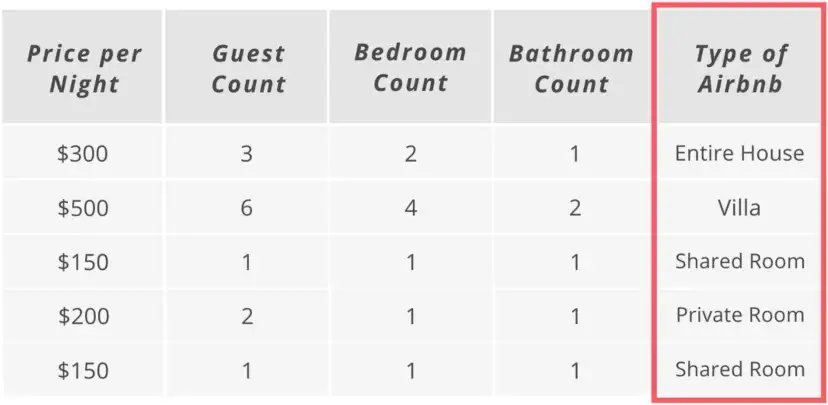

We can’t possibly understand the numerical differences between classes like these as they do not have any order or scale. But in a glance, the type of Airbnb seems something that could be really useful in predicting the price per night so we don’t want to drop it. So, we will go back to our question earlier — how do you deal with categorical variables like these? A possible solution would be to convert each class in numerical form.

**Label Encoding**

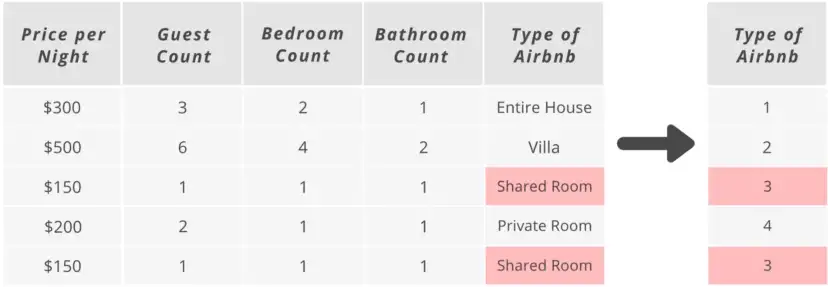

As you can see, the Entire House is assigned as 1, Villa as 2, Shared Room as 3, and Private Room as 4. This approach will actually work and the model will take this new variable without any problem at all. However, this may not be the best approach or transformation for this variable. Why? Because we have assigned an order form and scaled to the data where we don’t actually know if an order or scale exist. Here, we are telling the model that Shared Rooms are three times better than the entire house or a villa type of listing and will result in the model finding a false relationship or no relationship between this transformed variable (type of airbnb in numerical form) and our output variable (price per night).

Again with the question, “How do you deal with categorical variables like these?” The solution? Create new variables that are often called dummy variables. And to do this, we will use the process that is called One-Hot Encoding.

**“One-Hot Encoding is a representation of categorical variables as binary vectors.”**

Now, let’s transform our categorical variable Type of Airbnb using the one-hot encoding approach or represent the classes as binary vectors. 

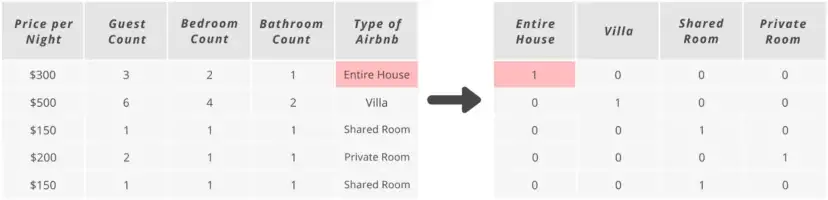

### The Dummy Variable Trap

To avoid this, perform the below operation.

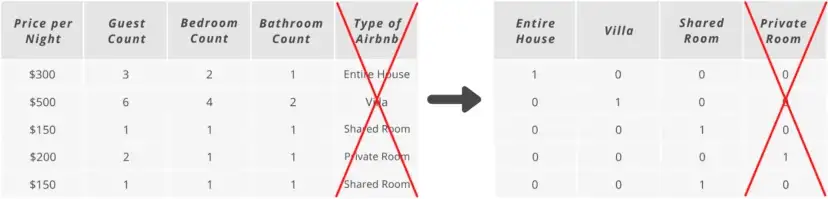

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("homeprices.csv")
df

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000

<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [27]:
dummies = pd.get_dummies(df.town)
dummies

monroe township  robinsville  west windsor
0              True        False         False
1              True        False         False
2              True        False         False
3              True        False         False
4              True        False         False
5             False        False          True
6             False        False          True
7             False        False          True
8             False        False          True
9             False         True         False
10            False         True         False
11            False         True         False
12            False         True         False

In [28]:
merged = pd.concat([df,dummies],axis='columns')
merged

town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000             True        False         False
1   monroe township  3000  565000             True        False         False
2   monroe township  3200  610000             True        False         False
3   monroe township  3600  680000             True        False         False
4   monroe township  4000  725000             True        False         False
5      west windsor  2600  585000            False        False          True
6      west windsor  2800  615000            False        False          True
7      west windsor  3300  650000            False        False          True
8      west windsor  3600  710000            False        False          True
9       robinsville  2600  575000            False         True         False
10      robinsville  2900  600000            False         True         False
11      robinsville  3100  620000            False         True         False
12      robinsville  3600  695000            False         True         False

In [29]:
final = merged.drop(['town'], axis='columns')
final

area   price  monroe township  robinsville  west windsor
0   2600  550000             True        False         False
1   3000  565000             True        False         False
2   3200  610000             True        False         False
3   3600  680000             True        False         False
4   4000  725000             True        False         False
5   2600  585000            False        False          True
6   2800  615000            False        False          True
7   3300  650000            False        False          True
8   3600  710000            False        False          True
9   2600  575000            False         True         False
10  2900  600000            False         True         False
11  3100  620000            False         True         False
12  3600  695000            False         True         False

<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [30]:
final = final.drop(['west windsor'], axis='columns')
final

area   price  monroe township  robinsville
0   2600  550000             True        False
1   3000  565000             True        False
2   3200  610000             True        False
3   3600  680000             True        False
4   4000  725000             True        False
5   2600  585000            False        False
6   2800  615000            False        False
7   3300  650000            False        False
8   3600  710000            False        False
9   2600  575000            False         True
10  2900  600000            False         True
11  3100  620000            False         True
12  3600  695000            False         True

In [31]:
X = final.drop('price', axis='columns')
X

area  monroe township  robinsville
0   2600             True        False
1   3000             True        False
2   3200             True        False
3   3600             True        False
4   4000             True        False
5   2600            False        False
6   2800            False        False
7   3300            False        False
8   3600            False        False
9   2600            False         True
10  2900            False         True
11  3100            False         True
12  3600            False         True

In [32]:
y = final.price

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(X,y)

LinearRegression()

In [35]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [36]:
model.score(X,y)

0.9573929037221873

In [37]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [38]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

C:\Users\AbdulAziz\anaconda3\envs\env_face\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])